In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('creditcard.csv')
data = pd.DataFrame(data)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data preparation

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


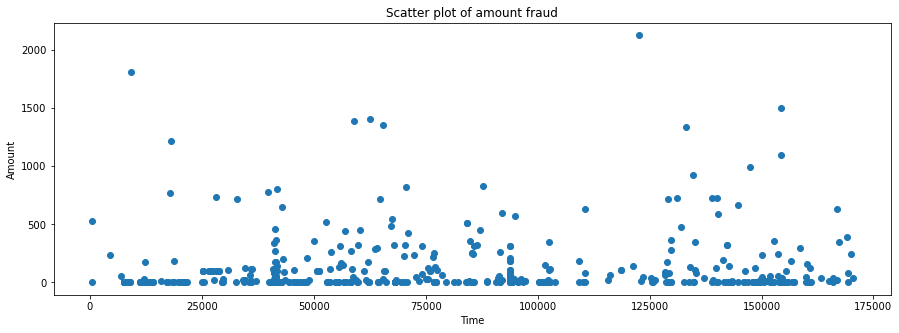

In [5]:
data_fraud = data[data['Class'] == 1]
plt.figure(figsize = (15,5))
plt.scatter(data_fraud['Time'], data_fraud['Amount'])
plt.title('Scatter plot of amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

It's seems there is no relationship betweem time and fraud amount. Mayority of fraud are small amounts.

In [6]:
data_fraud.shape

(492, 31)

In [7]:
big_fraud = data_fraud[data_fraud['Amount'] > 1000].shape[0]
print('There are ' + str(big_fraud) + ' frauds with amount bigger than 1000 over ' + str(data_fraud.shape[0]) + ' frauds.')

There are 9 frauds with amount bigger than 1000 over 492 frauds.


In [8]:
Fraud_cases = data_fraud.shape[0]
Non_fraud_cases = data[data['Class'] == 0].shape[0]
print('Fraud cases count = ', Fraud_cases)
print('Non fraud cases count = ', Non_fraud_cases)
total= Fraud_cases + Non_fraud_cases
print('Total cases: ', total)


print('Class 1 (fraud) percentage: ', (Fraud_cases/Non_fraud_cases)*100)
print('Class 0 percentage: ', 1-((Fraud_cases/Non_fraud_cases)*100))

Fraud cases count =  492
Non fraud cases count =  284315
Total cases:  284807
Class 1 (fraud) percentage:  0.17304750013189596
Class 0 percentage:  0.826952499868104


Class 1 is clearly under-represented and means only 17.3% of observations. Training a model in this situation will result in a
inefficient model and will predict Class 0 because it's the mayority of the observations.

Another problem of using this dataset to train our model is that since Class 1 is under-represented, the model
will assume that it is a rare case and will try to predict positive due to the lack of training data.

In cases like this where dataset is clearly unbalanced, adding additional data of the under-represented feature (over-sampling) is a solution. Since we don't have that option we have to resort to under-sampling.

## Features correlation

In [9]:
corr = data.corr()

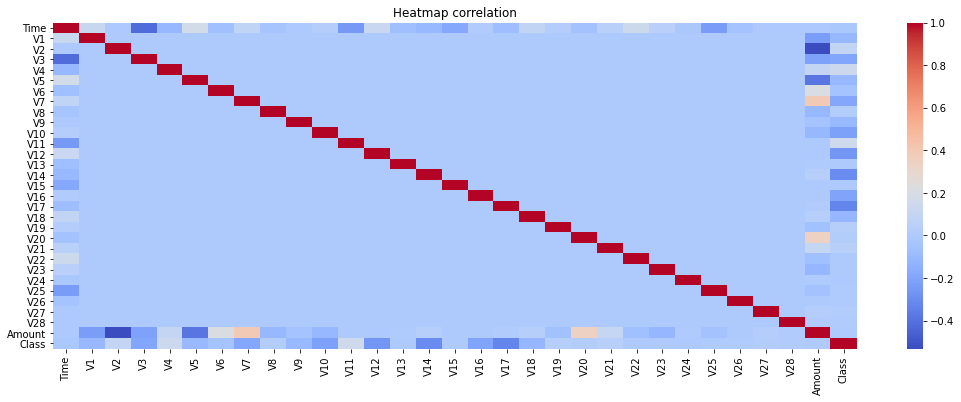

In [10]:
plt.figure(figsize = (18,6))
sns.heatmap(corr, cmap = 'coolwarm')

plt.title('Heatmap correlation')
plt.show()

In [11]:
#fraud indices
fraud_index = np.array(data[data['Class'] == 1].index)

#normal indices
normal_index = np.array(data[data['Class'] == 0].index)

#choosing random normal indices equal to the number of fraudulent transactions
random_normal_indices= np.random.choice(normal_index, Fraud_cases, replace= False)
random_normal_indices= np.array(random_normal_indices)

# concatenate fraud index and normal index to create a list of indices
undersampled_indices= np.concatenate([fraud_index, random_normal_indices])

#use the undersampled indices to build the undersampled_data dataframe
undersampled_data= data.iloc[undersampled_indices, :]

print(undersampled_data.head())

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.1778

### Explore undersampled data

In [12]:
Num_fraud_cases_sampled = len(undersampled_data[undersampled_data['Class'] == 1])
Num_NonFraud_cases_sampled = len(undersampled_data[undersampled_data['Class'] == 0])
total_sample = Num_fraud_cases_sampled + Num_NonFraud_cases_sampled

Fraud_percent_sample = Num_fraud_cases_sampled / total_sample
NonFraud_percent_sample = Num_NonFraud_cases_sampled / total_sample


print('Number of fraudulent transactions (Class 1): ', Num_fraud_cases_sampled)
print('Number of normal transactions (Class 0): ', Num_NonFraud_cases_sampled)
print('Total transactions: ', total_sample)
print('Percent of fraud transactions: ', Fraud_percent_sample * 100, '%')
print('Percent of normal transactions:', NonFraud_percent_sample * 100, '%')

Number of fraudulent transactions (Class 1):  492
Number of normal transactions (Class 0):  492
Total transactions:  984
Percent of fraud transactions:  50.0 %
Percent of normal transactions: 50.0 %


Amount and Time features have different scale, so we have to rescale them prior to create the prediction model

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
undersampled_data['scaled_Amount'] = sc.fit_transform(undersampled_data.iloc[:, 29].values.reshape(-1,1))

# Drop Time an old Amount features
undersampled_data = undersampled_data.drop(["Time", "Amount"], axis = 1)

undersampled_data.head()

<ipython-input-13-29a85056817e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undersampled_data['scaled_Amount'] = sc.fit_transform(undersampled_data.iloc[:, 29].values.reshape(-1,1))


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.429050
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.749099
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.558858
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.186118
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.424932


In [14]:
# Now we separate dependents an independent variables
X = undersampled_data.drop('Class', axis = 1)
y = undersampled_data['Class']

In [15]:
# Create train and test sets with train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('X_train lenght: ', len(X_train))
print('X_test lenght: ', len(X_test))
print('y_train lenght: ', len(y_train))
print('y_test lenght: ', len(y_test))

X_train lenght:  738
X_test lenght:  246
y_train lenght:  738
y_test lenght:  246


In [16]:
# SVM - Fitting our dataset to the classifier
from sklearn.svm import SVC

classifier = SVC(C=1, kernel='rbf', random_state = 0)
classifier.fit(X_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
#Predict classes using X_test
predictions = classifier.predict(X_test)

In [18]:
#Let's create the classification report and the confusion matrix to see the accuracy of our model

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print('-----------------------------------')
print(classification_report(y_test, predictions))

[[126   1]
 [ 13 106]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       127
           1       0.99      0.89      0.94       119

    accuracy                           0.94       246
   macro avg       0.95      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246



In [19]:
# Let's use GridSearchCV to see if our model is the best fit and to find the best parameters.

from sklearn.model_selection import GridSearchCV

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = 1)

grid_search = grid_search.fit(X_train, y_train.ravel())
best_accuracy = grid_search.best_score_
print('The best accuracy with gridsearch is: ', best_accuracy)


best_parameters = grid_search.best_params_
print('The best parameters for using the model is', best_parameters)

The best accuracy with gridsearch is:  0.9349129951869679
The best parameters for using the model is {'C': 1, 'kernel': 'linear'}


#### Now we use this parameter to train our SVM classifier

In [20]:
# SVC with best parameter C and kernel

classifier_with_best_params = SVC(C=best_parameters["C"], kernel=best_parameters["kernel"], random_state = 0)

classifier_with_best_params.fit(X_train, y_train.ravel())

predictions_with_best_params = classifier_with_best_params.predict(X_test)

print(confusion_matrix(y_test, predictions_with_best_params))
print('-----------------------------------')
print(classification_report(y_test, predictions_with_best_params))

[[125   2]
 [  8 111]]
-----------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       127
           1       0.98      0.93      0.96       119

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



#### Let's try now our model with the original dataset

In [21]:
# Make a copy of our original dataset
datacopy = data.copy()

#Scale Amount feature
datacopy['scaled Amount'] = sc.fit_transform(datacopy.iloc[:, 29].values.reshape(-1,1))

# Drop Time an old Amount features
datanew = datacopy.drop(["Time", "Amount"], axis = 1)

datanew.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [22]:
# Now we separate dependents an independent variables
X_new = datanew.drop('Class', axis = 1)
y_new = datanew['Class']

In [23]:
#splitting the full dataset into training and test set

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)

print('X_new_train lenght: ', len(X_new_train))
print('X_new_test lenght: ', len(X_new_test))
print('y_new_train lenght: ', len(y_new_train))
print('y_new_test lenght: ', len(y_new_test))

X_new_train lenght:  213605
X_new_test lenght:  71202
y_new_train lenght:  213605
y_new_test lenght:  71202


#### Let's create our predictions for the full dataset using our predictor with best parameters

In [24]:
y_pred_dataset = classifier_with_best_params.predict(X_new_test)

confusion_matrix_new = confusion_matrix(y_new_test, y_pred_dataset)
print(confusion_matrix_new)
print('---------------------------')
print(classification_report(y_new_test, y_pred_dataset))

[[69568  1514]
 [    9   111]]
---------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71082
           1       0.07      0.93      0.13       120

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.56     71202
weighted avg       1.00      0.98      0.99     71202



#### Considering above confussion matrix it's clear that the dataset is unbalanced considering the result of this confusion matrix and classification report. We get a 93% of accuracy in f1-score, but there is great difference in precision for the two classes.